# Lecture 23 – Data 100, Summer 2024

Data 100, Summer 2024

[Acknowledgments Page](https://ds100.org/su24/acks/)

In [2]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(21)

# Linear Classification

In [4]:
from sklearn import datasets

iris_data = datasets.load_iris()
iris_labels = iris_data['target_names'][iris_data['target']]
iris_data = pd.DataFrame(data= iris_data['data'],
                         columns= iris_data['feature_names'])
iris_data.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_data['species'] = iris_labels

In [5]:
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
92,5.8,2.6,4.0,1.2,versicolor
44,5.1,3.8,1.9,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
95,5.7,3.0,4.2,1.2,versicolor


<Axes: xlabel='petal_length', ylabel='petal_width'>

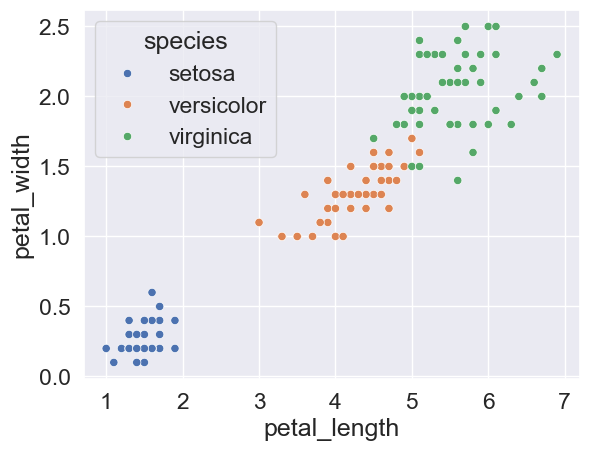

In [6]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")

In [7]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(multi_class = 'ovr')
logistic_regression_model = logistic_regression_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

(0.0, 2.8)

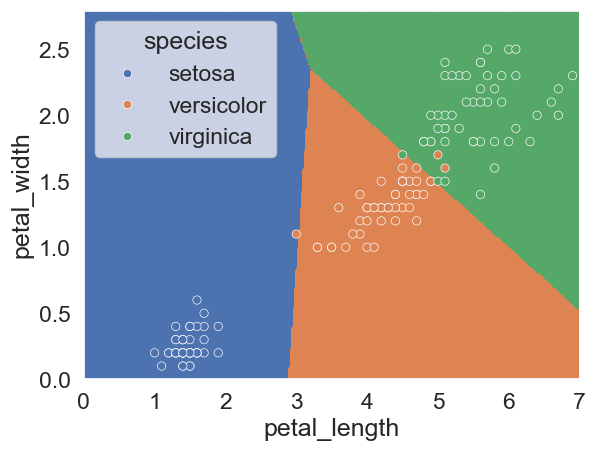

In [8]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.xlim(0, 7)
plt.ylim(0, 2.8)

In [9]:
iris_data[["petal_length", "petal_width"]]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [10]:
logistic_regression_model.predict([[1.4, 0.2]])

array(['setosa'], dtype=object)

In [11]:
logistic_regression_model.predict_proba([[1.4, 0.2]])

array([[8.19158238e-01, 1.80840198e-01, 1.56332944e-06]])

In [12]:
logistic_regression_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Decision Tree Classification

In [13]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [14]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
52,6.9,3.1,4.9,1.5,versicolor
29,4.7,3.2,1.6,0.2,setosa
99,5.7,2.8,4.1,1.3,versicolor
16,5.4,3.9,1.3,0.4,setosa


In [15]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['versicolor', 'setosa', 'versicolor', 'setosa'], dtype=object)

[Text(0.5, 0.9166666666666666, 'petal_length <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4090909090909091, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.4545454545454546, 0.8333333333333333, 'True  '),
 Text(0.5909090909090909, 0.75, 'petal_width <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5454545454545454, 0.8333333333333333, '  False'),
 Text(0.36363636363636365, 0.5833333333333334, 'petal_length <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.18181818181818182, 0.4166666666666667, 'petal_width <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.09090909090909091, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.2727272727272727, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.5454545454545454, 0.4166666666666

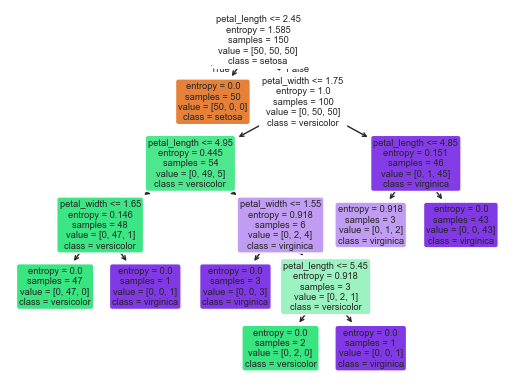

In [16]:
tree.plot_tree(decision_tree_model, 
               feature_names = ["petal_length", "petal_width"],
               class_names = ["setosa", "versicolor", "virginica"],
               rounded = True, filled = True)

<Axes: xlabel='petal_length', ylabel='petal_width'>

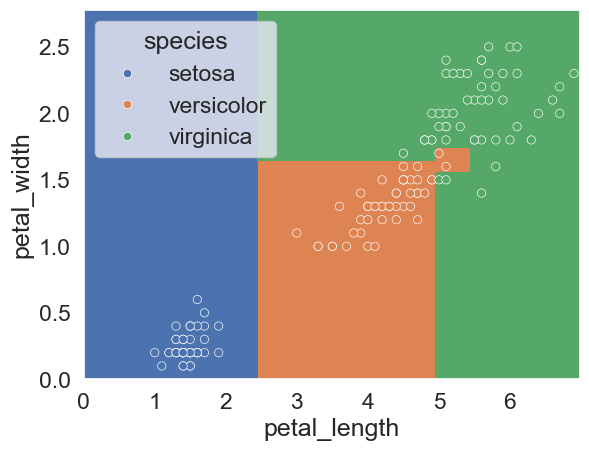

In [17]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")

In [18]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

0.9933333333333333

In [19]:
iris_data[(iris_data["petal_length"]> 2.45)&(iris_data["petal_width"]> 1.75)&(iris_data["petal_length"]<=4.85)]

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


# Overfitting
Instead of the petal measurements, let's use the sepal measurements to train the decision tree.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

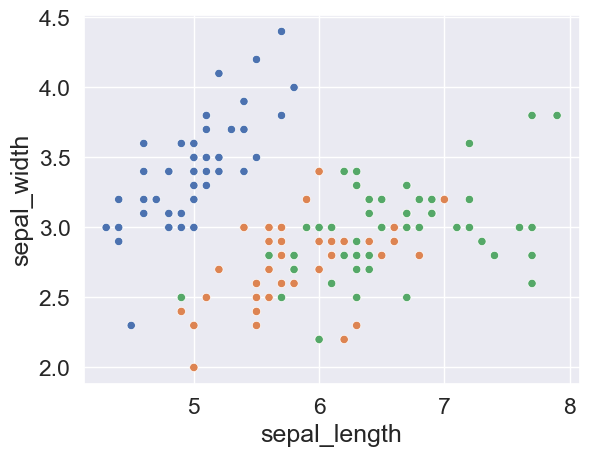

In [20]:
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)

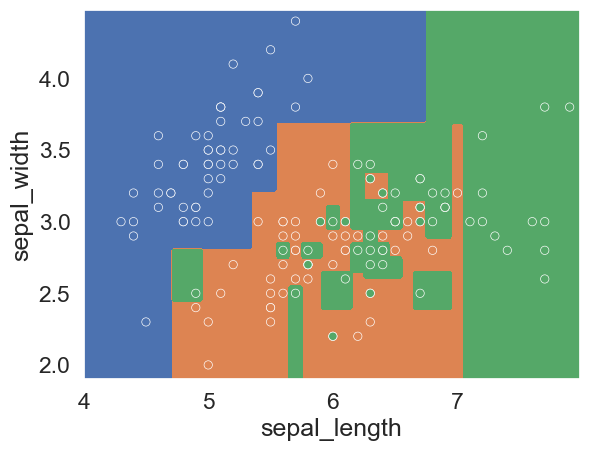

In [21]:
sepal_decision_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
sepal_decision_tree_model = decision_tree_model.fit(iris_data[["sepal_length", "sepal_width"]], iris_data["species"])
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
# fig.savefig("iris_sepal_decision_boundaries_all_150_points.png", dpi=300, bbox_inches = "tight")

Let's split the dataset into a training set with 110 observations, and a validation set with 40 observations.

In [22]:
train_iris_data, valid_iris_data = np.split(iris_data.sample(frac=1), [110])
print(train_iris_data.shape, valid_iris_data.shape)

(110, 5) (40, 5)


In [23]:
# Sort so that the plot color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
valid_iris_data = valid_iris_data.sort_values(by="species")

In [24]:
train_iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
40,5.0,3.5,1.3,0.3,setosa
13,4.3,3.0,1.1,0.1,setosa
30,4.8,3.1,1.6,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


We use the training data to fit our old model (using the petal measurements `petal_length` and `petal_width`):

In [25]:
decision_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
decision_tree_model = decision_tree_model.fit(train_iris_data[["petal_length", "petal_width"]], train_iris_data["species"])

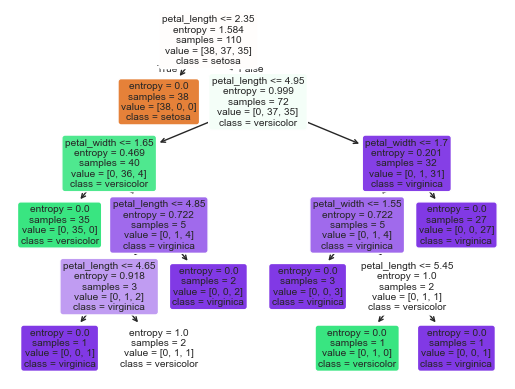

In [26]:
tree.plot_tree(decision_tree_model, feature_names = ["petal_length", "petal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True);

Decision boundary on the training data:

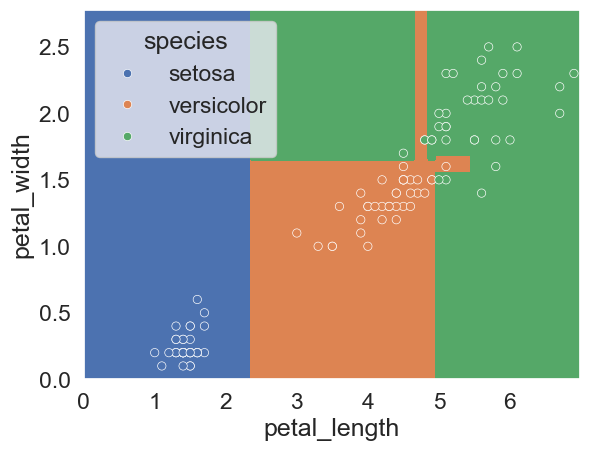

In [27]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "petal_length", y="petal_width", hue="species");

Decision boundary and the validation data:

<Axes: xlabel='petal_length', ylabel='petal_width'>

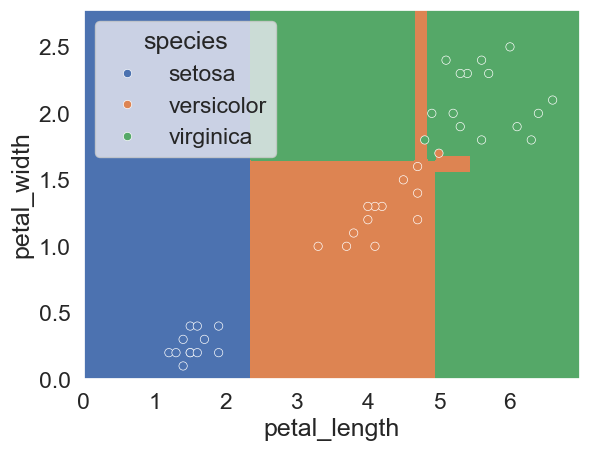

In [28]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = valid_iris_data, x = "petal_length", y="petal_width", hue="species")

Accuracy on the traning data:

In [29]:
accuracy_score(decision_tree_model.predict(train_iris_data[["petal_length", "petal_width"]]), train_iris_data["species"])

0.990909090909091

Accuracy on the validation data:

In [30]:
predictions = decision_tree_model.predict(valid_iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, valid_iris_data["species"])

0.95

Let's now use the sepal measurements (`sepal_length` and `sepal_width`) to train the decision trees.

In [31]:
sepal_decision_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
sepal_decision_tree_model = sepal_decision_tree_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

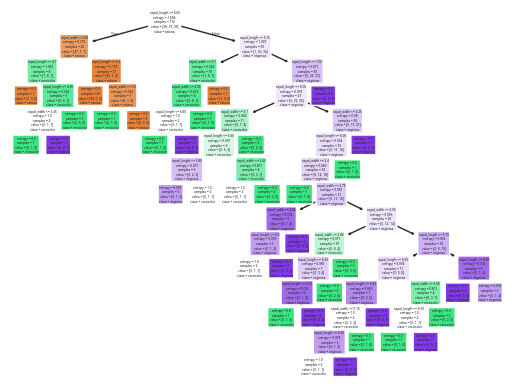

In [32]:
tree.plot_tree(sepal_decision_tree_model, feature_names = ["sepal_length", "sepal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True);

Decision boundary and training data:

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

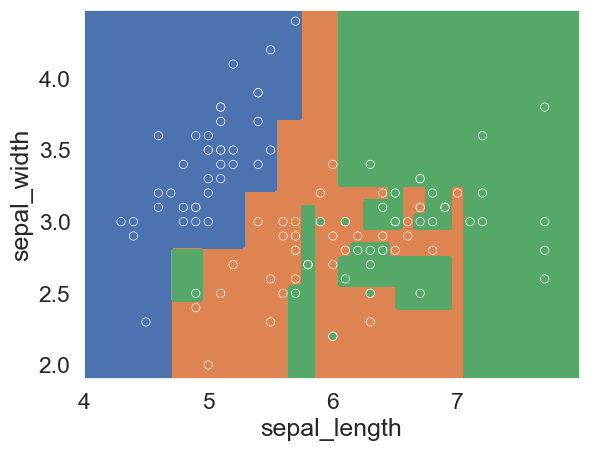

In [33]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)

Decision boundary and validation data:

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

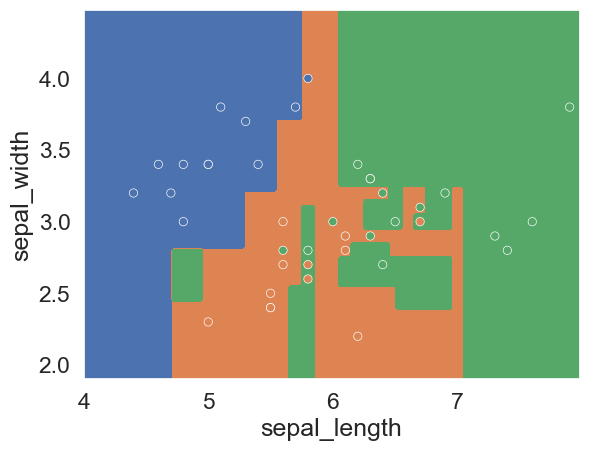

In [34]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = valid_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)

Accuracy on the training data:

In [35]:
accuracy_score(sepal_decision_tree_model.predict(train_iris_data[["sepal_length", "sepal_width"]]), train_iris_data["species"])

0.9454545454545454

Accuracy on the validation data:

In [36]:
accuracy_score(sepal_decision_tree_model.predict(valid_iris_data[["sepal_length", "sepal_width"]]), valid_iris_data["species"])

0.75

<br>
<hr>
<br>
Naturally, we can include even more features. For example, if we want to use the petal AND sepal measurements, we simply train the decision tree on all four columns of the data.

In [37]:
decision_tree_model_4d = tree.DecisionTreeClassifier(criterion="entropy")
decision_tree_model_4d = decision_tree_model_4d.fit(train_iris_data[["petal_length", "petal_width", 
                                                                     "sepal_length", "sepal_width"]], train_iris_data["species"])

In [38]:
predictions = decision_tree_model_4d.predict(train_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, train_iris_data["species"])

1.0

In [39]:
predictions = decision_tree_model_4d.predict(valid_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, valid_iris_data["species"])

0.975

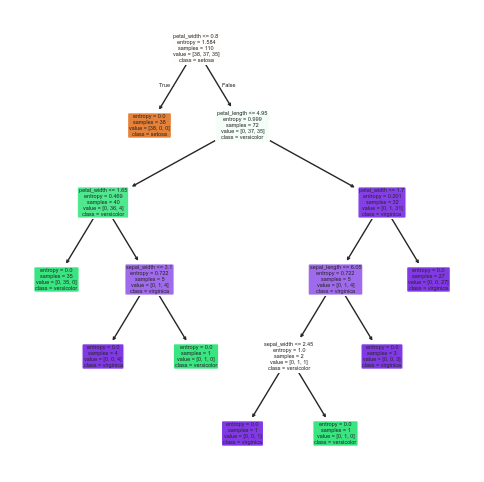

In [40]:
plt.figure(figsize=(6,6))  # set plot size (denoted in inches)
tree.plot_tree(decision_tree_model_4d, feature_names = ["petal_length", "petal_width", "sepal_length", "sepal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True, fontsize=4)
plt.show()

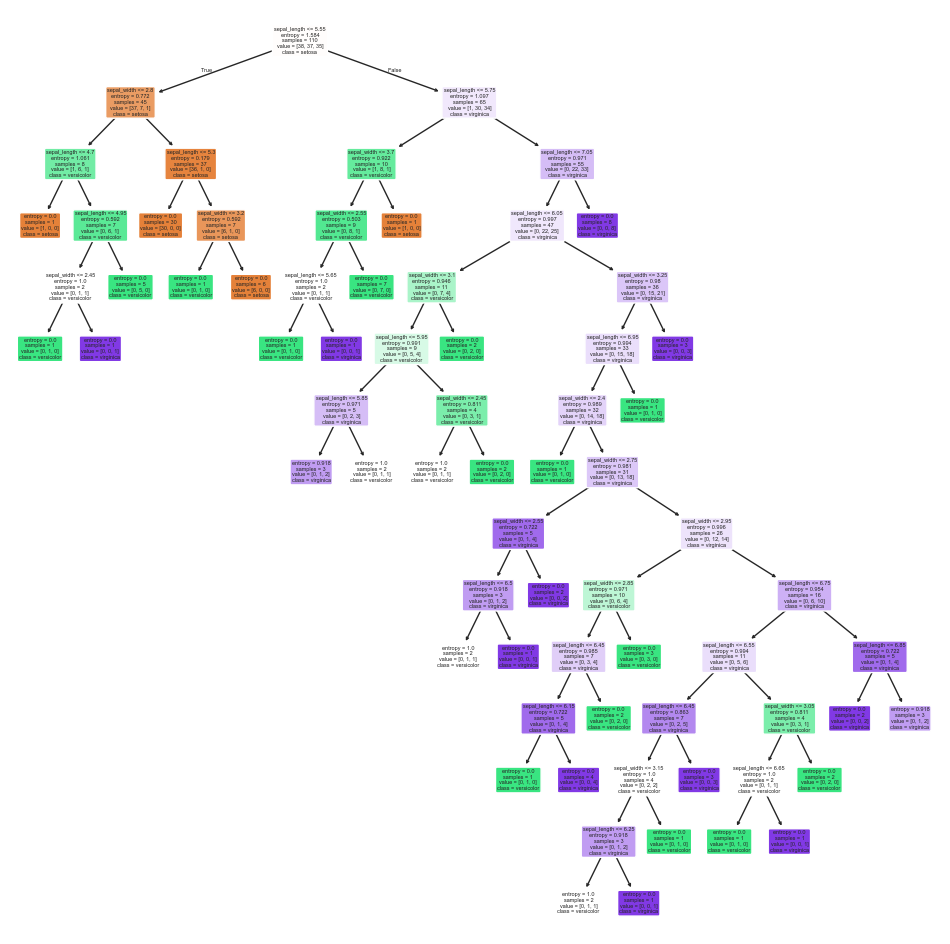

In [41]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(sepal_decision_tree_model, feature_names = ["sepal_length", "sepal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True, fontsize=4)
plt.show()

Comparing our decision tree diagram with four features (petal and sepal) versus our decision tree diagram with just sepal featuers, we can see that the 4d-model does not overfit, even though it has access to all of these features. Instead, these two models are extremely similar. In fact, our 4d-model only makes use of the setal features exactly once, and that's to resolve the tricky case we had before where there were overlapping virginica and versicolor flowers. 

This showcases that for decision tree models, more features doesn’t necessarily lead to overfitting, especially if a small subset of the features do a good job of resolving the difference between the classes.

<br>
<hr>
<br">

Say we want to just use sepal features. Looking at the corresponding decision tree rules and train/validation accuracy (94.5% versus 75%), it seems like we may be overfitting! 

Let's try to prevent growth using two `sklearn` hyperparameters: `min_samples_split` and `max_depth`. You can read more about these hyperparameters (and others) in the [DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

### `min_samples_split`

In [42]:
sepal_decision_tree_model_minsamples = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=10)
sepal_decision_tree_model_minsamples = sepal_decision_tree_model_minsamples.fit(train_iris_data[["sepal_length", "sepal_width"]], 
                                                    train_iris_data["species"])

Let's compare the resulting decision tree rules with `min_samples_split = 10` versus before (default `min_samples_split = 2`).

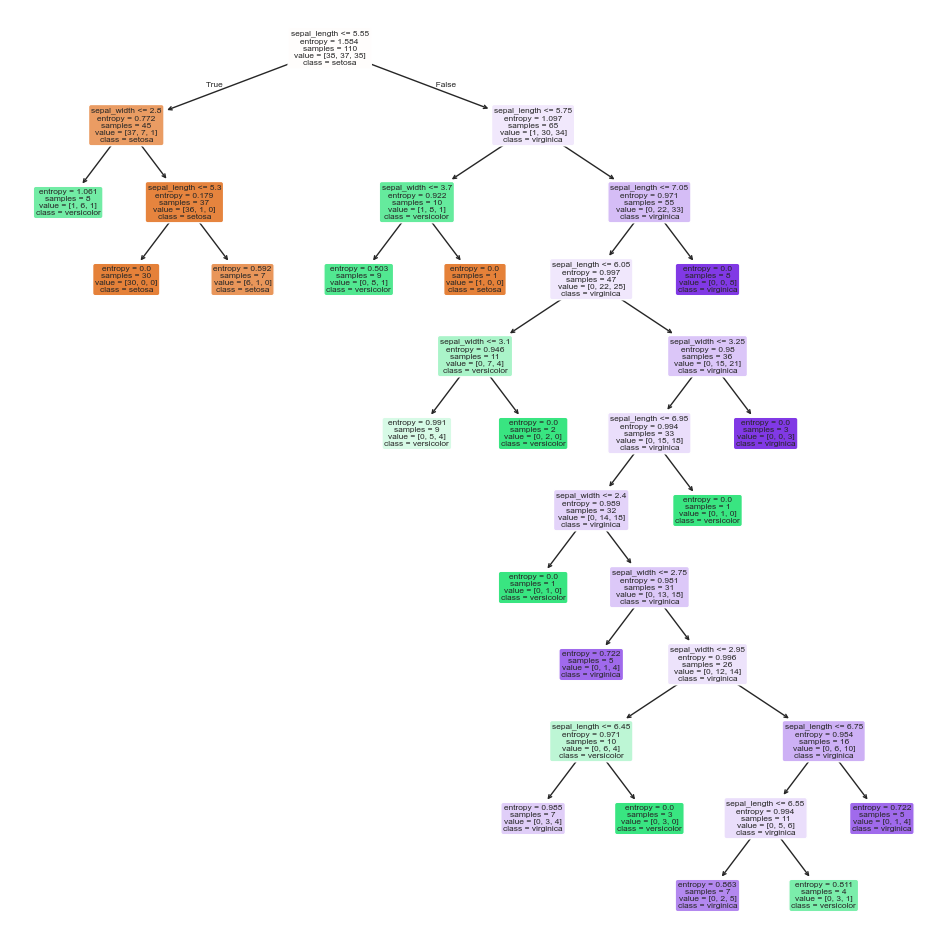

In [43]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(sepal_decision_tree_model_minsamples, feature_names = ["sepal_length", "sepal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True, fontsize=6)
plt.show()

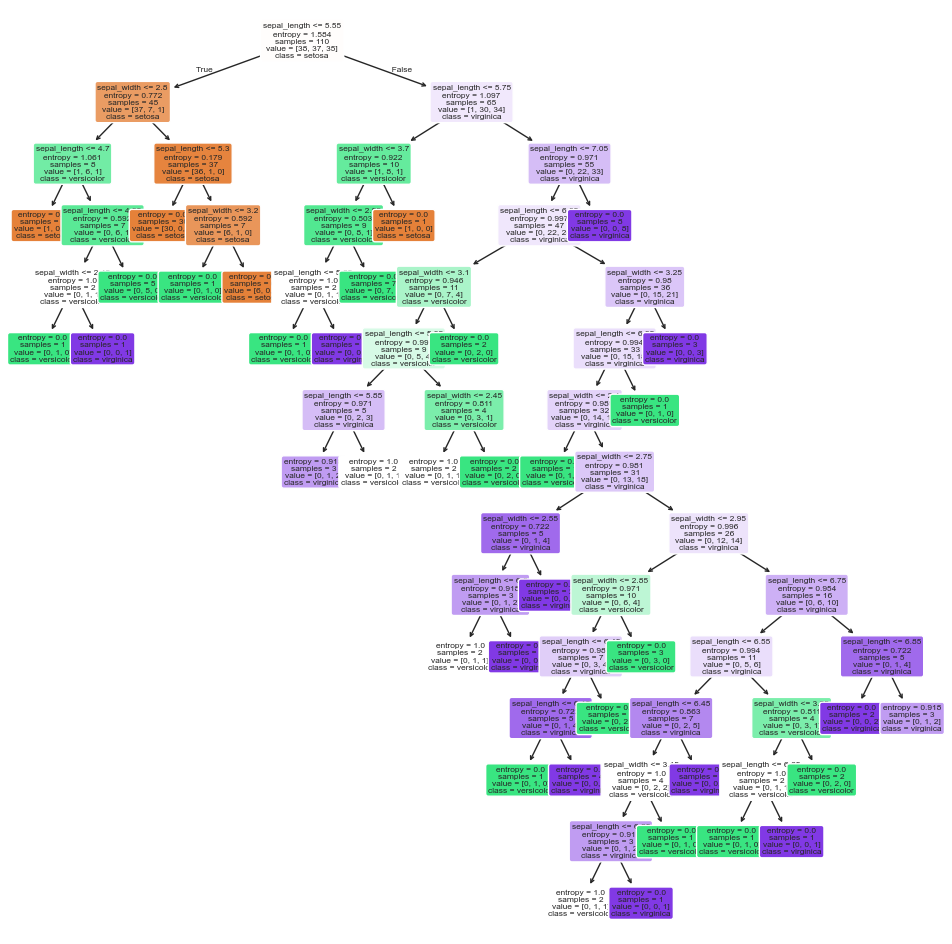

In [44]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(sepal_decision_tree_model, feature_names = ["sepal_length", "sepal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True, fontsize=6)
plt.show()

In [45]:
print('train accuracy:', accuracy_score(sepal_decision_tree_model_minsamples.predict(train_iris_data[["sepal_length", "sepal_width"]]), 
                     train_iris_data["species"]))

train accuracy: 0.8545454545454545


In [46]:
print('validation accuracy:', accuracy_score(sepal_decision_tree_model_minsamples.predict(valid_iris_data[["sepal_length", "sepal_width"]]), 
                     valid_iris_data["species"]))

validation accuracy: 0.8


### `max_depth`

In [47]:
sepal_decision_tree_model_maxdepth = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
sepal_decision_tree_model_maxdepth = sepal_decision_tree_model_maxdepth.fit(train_iris_data[["sepal_length", "sepal_width"]], 
                                                    train_iris_data["species"])

Let's compare the resulting decision tree rules with `max_depth = 5` versus before (default `max_depth = None` or no max depth).

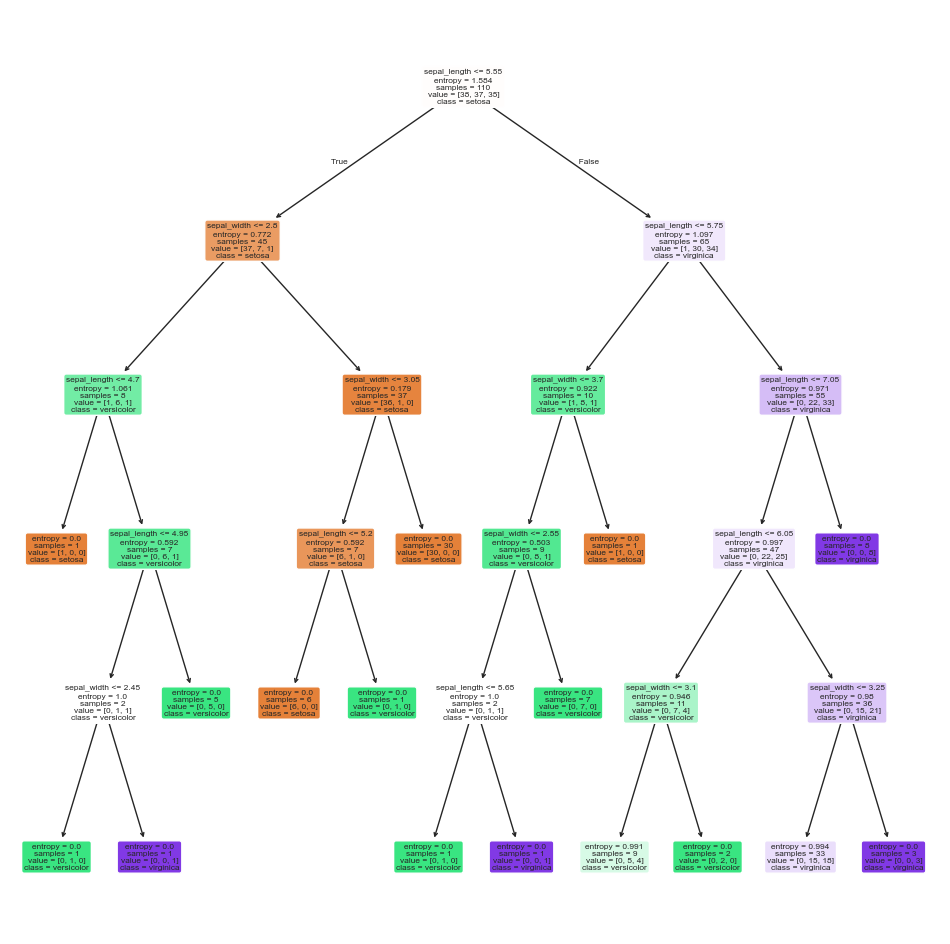

In [48]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(sepal_decision_tree_model_maxdepth, feature_names = ["sepal_length", "sepal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True, fontsize=6)
plt.show()

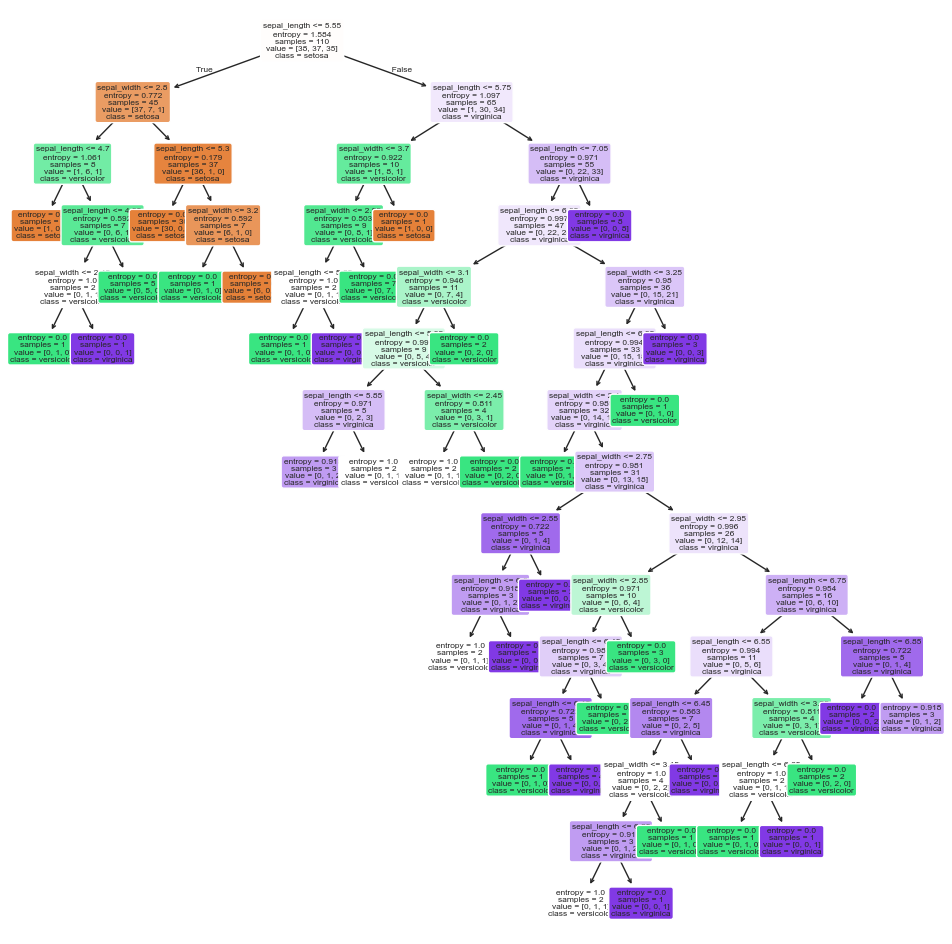

In [49]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(sepal_decision_tree_model, feature_names = ["sepal_length", "sepal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True, fontsize=6)
plt.show()

In [50]:
print('train accuracy:', accuracy_score(sepal_decision_tree_model_maxdepth.predict(train_iris_data[["sepal_length", "sepal_width"]]), 
                     train_iris_data["species"]))

train accuracy: 0.8272727272727273


In [51]:
print('train accuracy:', accuracy_score(sepal_decision_tree_model_maxdepth.predict(valid_iris_data[["sepal_length", "sepal_width"]]), 
                     valid_iris_data["species"]))

train accuracy: 0.775


We can also use these hyperparameters together and/or with other hyperparameters.

<br>
<hr>
<br>
Let's see how different the decision trees could have been if the data had been slightly different.

The code below generates new train-validation splits (by shuffling the data) and then fits Decision Trees on the training data. It does this 10 times.

In [52]:
ten_decision_tree_models = []
ten_training_sets = []
for i in range(10):
    current_model = tree.DecisionTreeClassifier(criterion="entropy")
    temp_iris_training_data, temp_iris_test_data = np.split(iris_data.sample(frac=1), [110])
    temp_iris_training_data = temp_iris_training_data.sort_values("species")
    current_model.fit(temp_iris_training_data[["sepal_length", "sepal_width"]], temp_iris_training_data["species"])
    ten_decision_tree_models.append(current_model)
    ten_training_sets.append(temp_iris_training_data)

In [53]:
def plot_decision_tree(decision_tree_model, data = None, disable_axes = False):
    from matplotlib.colors import ListedColormap
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

    xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

    Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
    if data is not None:
        sns.scatterplot(data = data, x = "sepal_length", y="sepal_width", hue="species", legend=False);

    if disable_axes:
        plt.axis("off")

Let's visualize the decision boundaries for these ten Decision Trees.

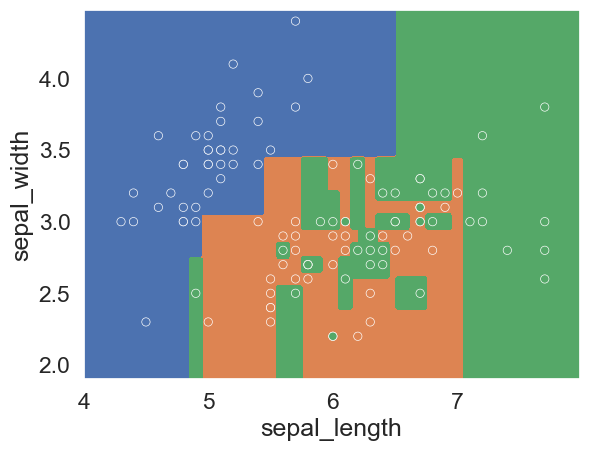

In [54]:
m_num = 0
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])

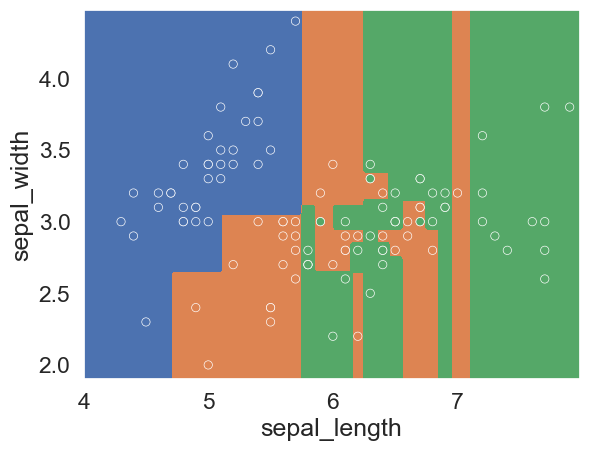

In [55]:
m_num = 7
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])

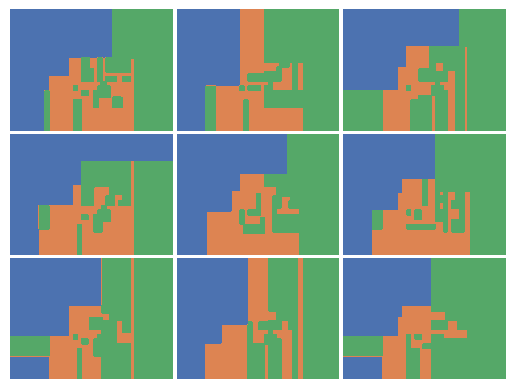

In [56]:
# Decision boundaries for 9 Decision Trees 
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 

for i in range(0, 9):
    plt.subplot(gs1[i]) #3, 3, i)
    plot_decision_tree(ten_decision_tree_models[i], None, True)    

What do we do?
* Idea 1: Bagging or Bootstrap Aggregating (Leo Breiman).
* Idea 2: Only use a random subset of m features at each split.

# Random Forests 

Important arguments ([sklearn RandomForestClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)):
* `n_estimators, default = 100`
* `bootstrap, default = True`
* `max_features, default = 'sqrt'`
* `max_depth, default = None` (same as `DecisionTreeClassifier`)
* `min_samples_split, default = 2` (same as `DecisionTreeClassifier`)

In [57]:
from sklearn import ensemble

sepal_random_forest_model = ensemble.RandomForestClassifier(criterion="entropy", max_depth=5, min_samples_split=10)
sepal_random_forest_model = sepal_random_forest_model.fit(train_iris_data[["sepal_length", "sepal_width"]], 
                                                          train_iris_data["species"])
sepal_random_forest_model

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [58]:
print('train accuracy:', accuracy_score(sepal_random_forest_model.predict(train_iris_data[["sepal_length", "sepal_width"]]),
                                        train_iris_data["species"]))

train accuracy: 0.8454545454545455


In [59]:
print('validation accuracy:', accuracy_score(sepal_decision_tree_model_minsamples.predict(valid_iris_data[["sepal_length", "sepal_width"]]),
                                             valid_iris_data["species"]))

validation accuracy: 0.8
